### Exemple d'utilisation d'une fonction TF_IDF

Importation d'éléments scrappés

In [1]:
import os
import pandas as pd
l=[]
for fichier in os.listdir('data'):
    #print('##############################')
    l.append(pd.read_csv('data/'+fichier))

df=pd.concat(l,ignore_index=True)
df

,user,rating,date,review
0,Peter,"5,0",13 mars 2018,Pour remplacer une télé LED HD Samsung endomma...
1,LeControleur,"4,0",13 septembre 2017,Une bonne télé qui fait bien l'affaire. Foncti...
2,DUMONT,"4,0",13 février 2018,"Après un retard de livraison de 2 jours, le pr..."
3,AJM,"5,0",14 juillet 2018,HKC-24C2NB-60-50cm-1920x1080 -- B075NB4J31\nJ'...
4,LABONNE Ronel,"1,0",31 août 2018,Au bout de six mois est apparu ligne noire hor...
5,Celumil,"4,0",21 juillet 2018,Sur Amazon Allemagne (au moment où j'écris ce ...
6,mathon,"5,0",30 octobre 2018,"Produit reçu conforme a la description, belle ..."
7,Portret Hervé,"4,0",23 juin 2018,"Reçu le jour prévu comme souvent avec Amazon, ..."
8,erbrmat,"4,0",1 juin 2018,j'ai acheté cette TV comme appoint pour la ch...
9,capitaine40,"3,0",19 septembre 2018,"article très bien propre bien transporté, mais..."


In [2]:
print('Df concatené brut',df.shape)
print("Apres avoir enlever les lignes redondantes", df.drop_duplicates(['review'],inplace=True),df.shape)

Df concatené brut (12360, 4)
Apres avoir enlever les lignes redondantes None (11674, 4)


In [3]:
df['rating']=df['rating'].str.replace(',0','').astype(int)
df.head()

,user,rating,date,review
0,Peter,5,13 mars 2018,Pour remplacer une télé LED HD Samsung endomma...
1,LeControleur,4,13 septembre 2017,Une bonne télé qui fait bien l'affaire. Foncti...
2,DUMONT,4,13 février 2018,"Après un retard de livraison de 2 jours, le pr..."
3,AJM,5,14 juillet 2018,HKC-24C2NB-60-50cm-1920x1080 -- B075NB4J31\nJ'...
4,LABONNE Ronel,1,31 août 2018,Au bout de six mois est apparu ligne noire hor...


In [4]:
df['rating'].value_counts()

5    7024
4    2294
1     979
3     874
2     503
Name: rating, dtype: int64

#### Je change les labels : 1,2,3 ==> 0 et 4,5==> 1

In [6]:
df.loc[df[df['rating'] <4].index,'rating']=0
df.loc[df[df['rating'] > 3].index,'rating']=1
df['rating'].value_counts()

1    9318
0    2356
Name: rating, dtype: int64

#### Je construis un dataset avec repartition équilibrée de 0 et 1

In [7]:
balance=2356
li=[]
for elem in df['rating'].unique():
    tmp=df[df['rating']==elem].sample(balance)
    tmp.drop_duplicates(['review'],inplace=True)
    print(elem,len(tmp))
    li.append(tmp)

df=pd.concat(li)

1 2356
0 2356


In [8]:
df['rating'].value_counts()

1    2356
0    2356
Name: rating, dtype: int64

#### Fonction nettoyage

In [9]:
import re
import unidecode
global stop

from nltk.corpus import stopwords
sw1 = (stopwords.words('french'))
from stop_words import get_stop_words
sw2 = list(get_stop_words('fr'))
# Fusion des listes
sw=list(set(sw1+sw2))

# Normalisation Stop words : 1) enlever les accents
stop=[]
for elem in sw:
    stop.append(unidecode.unidecode(elem))

In [10]:
def nettoyage(text):
    l=[]
    # Normalisation : 1) Minuscule
    text=str(text).lower()
    # Normalisation : 2) Enlever les accents
    text=unidecode.unidecode(text)
    
    # Nettoyage : 3) Enlever les caracteres speciaux (chiffres, ponctuation,"&,@, ....")
    p=('([a-z]{1,})')
    text=' '.join(re.findall(p,text.lower().replace('ç','c').replace('û','u').replace('\n',' ')))
    
    # Nettoyage du texte enlevant les stop words de celui ci
    for token in text.split():
        if token in stop:
            continue
        else:
            l.append(token)
            
    # retourne texte nettoyé dans le format d'origine
    return ' '.join(l)
        
df['review']=df['review'].apply(nettoyage)

#### Construction de la matrice TF IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])

#### Bonus : Je récupere les mots les plus pertinents par commentaires

In [12]:
df['review'].iloc[19]

'cellophane neuf probleme recommande cher'

In [13]:
# Je travaille la matrice tfidf pour la rendre intelligible et je la stock dans df_f
df_f=pd.DataFrame(X.toarray())
df_f.columns=vectorizer.get_feature_names()

In [14]:
mot=[]
a=[]

for i in df_f.index:
    tmp=df_f.loc[i]
    
    # nombre de mot à extraire
    nb=10
    
    while nb !=0:
        # J'ai ajouté cette condition car idmax prends les noms des colonnes par ordre alphabétique 
        # si le nombre de mot (nb) est superieur aux mots disponible sur chaque ligne 
        if (tmp[tmp.idxmax(axis=1)]) == 0.:
            a.append('')
        else:
            a.append(tmp.idxmax(axis=1))
            del tmp[tmp.idxmax(axis=1)]
        nb=nb-1
    mot.append(a)
    a=[]

df['mot']=mot
good=df[df['rating']==1]['mot']
bad=df[df['rating']==0]['mot']

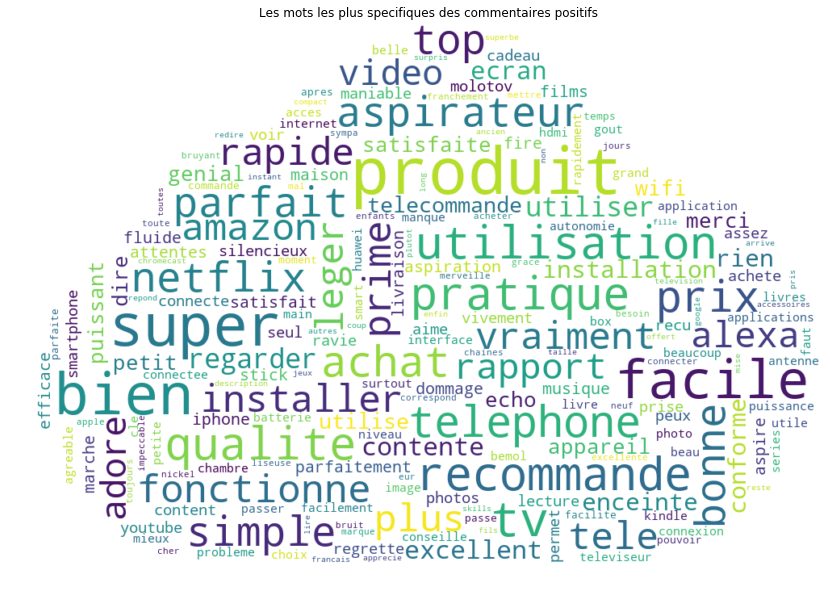

In [15]:
from wordcloud import WordCloud
from PIL import Image
from os import path
import numpy as np
%matplotlib inline

# Pour observer la representation des mots extraits des commentaires positifs: positif=1,
# sinon, les commentaires négatifs s'affichent
positif=1

if positif == 1:    
    commentaire=good
    com='positifs'
else :
    commentaire=bad
    com='négatifs'
    
df4 = pd.DataFrame(data={}, columns=range(1,11))
for idx, l in enumerate(commentaire):
    df4.loc[idx] = l
df5 = df4.copy().stack().value_counts()
    
# J'enleve le premier element de la liste (il s'agit d'un element vide)
text=df5[1:]

# Generate a word cloud image
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
mask_cloud = np.array(Image.open("mask-cloud2.png"))

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",mask=mask_cloud,max_font_size=80, relative_scaling=.5).fit_words(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Les mots les plus specifiques des commentaires '+com)
plt.show()

1) Determination X et y

In [16]:
# X avait été défini comme la matrice TFIDF, c'est notre matrice de feature le score de chaque mot du corpus
# dans chacun de ses éléments (les commentaires)
X=X
y=df['rating']

2) Creation du dataset de train et test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

3) entrainement

LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
clf.predict(X_test)

0.8050847457627118


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,

svm

In [20]:
from sklearn import svm
clf = svm.LinearSVC(dual=True,multi_class='ovr')
clf.fit(X_train, y_train)  
clf.score(X_test,y_test)

0.7944915254237288

SGDClassifier

In [19]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

/home/david/anaconda3/envs/flask/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8029661016949152

#### Et maintenant la predction de vos commentaires

In [22]:
# je sauve le vaocabulaire (tous les mots du corpus utilisé dans notre matrice TFIDF)
# format pickle, super interessant
import pickle
pickle.dump(vectorizer.vocabulary_,open("base.pkl","wb"))

In [25]:
# Je vous sollicite pour tester votre commentaire
commentaire=str(input())
commentaire=nettoyage(commentaire)


from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
import numpy as np

#Je prepare un TFIDF spécifique en utilisant ceux de la matrice TFIDF de 'entrainement pour ce nouveau 
# commentaire
transformer = TfidfTransformer()
loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("base.pkl", "rb")))
tfidf = transformer.fit_transform(loaded_vec.fit_transform(np.array([commentaire])))

# Je predispose des relances automatiques selon le resultat de la prediction 0 ou 1
d={0:"C'est pas super sympa ça comme commentaire", 1 : " Ok, donc, à priori, t'as plutot kiffé ce produit"}

# J'appel la mehode predict associé à notre nouvel objet clf (le classifier entrainé avec le meilleur score)
d[clf.predict(tfidf.toarray())[0]]

Produit pas trop mal, pas chere, leger


" Ok, donc, à priori, t'as plutot kiffé ce produit"